In [49]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

In [50]:
num_frames = 100
timestep = 0.05
# t_vals = np.linspace(0.0, (num_frames-1)*timestep, num_frames)
# print(t_vals)
t_vals = np.linspace(0.0, (num_frames)*timestep, num_frames+1)
t_vals = t_vals[1:]
# s_vals = np.linspace(0.0, 2*np.pi, 101)
s_vals = np.linspace(1.0, 5.0, 100)
# s_vals = np.linspace(0, 100, 101)
# s_vals[0] = 1e-10
# s_vals = s_vals[:-1]
# print(s_vals)
r_vals = np.linspace(0.0, 10.0, 501)
r_vals = r_vals[:-1]

# # get the range of k values
# k_vals = fft.fftfreq(r_vals.shape[0], d=r_vals[1]-r_vals[0])
# k_vals = fft.fftshift(k_vals)
# # k_vals = 2 * np.pi * k_vals
# # print(k_vals)
# print(f"shape of k_vals : {k_vals.shape}")

In [51]:
dk = 1/(r_vals[-1]-r_vals[0])
# we need only the positive k values
k_vals = np.linspace(0.0, np.pi*dk, (r_vals.shape[0]))
# k_vals = np.linspace(-np.pi*dk, np.pi*dk, (r_vals.shape[0]))
# k_vals = np.linspace(-np.pi/dk, np.pi/dk, r_vals.shape[0])
# print(k_vals)
print(k_vals.shape)

(500,)


In [52]:
alpha0 = 0.5
d0 = 2.0

In [53]:
u_test = np.zeros((s_vals.shape[0], k_vals.shape[0]))
for i in range(s_vals.shape[0]):
    for j in range(k_vals.shape[0]):
        u_test[i, j] = s_vals[i]**(alpha0-1) / (s_vals[i]**(alpha0) + d0*k_vals[j]**2)
# print(u_test)
# print(np.trapz(u_test, k_vals, axis=1).reshape(-1, 1)[0])
u_test = u_test / np.trapz(u_test, k_vals, axis=1).reshape(-1, 1)
# for i in range(u_test.shape[0]):
#     u_test[i, :] = u_test[i, :] / np.trapz(u_test[i, :], k_vals)

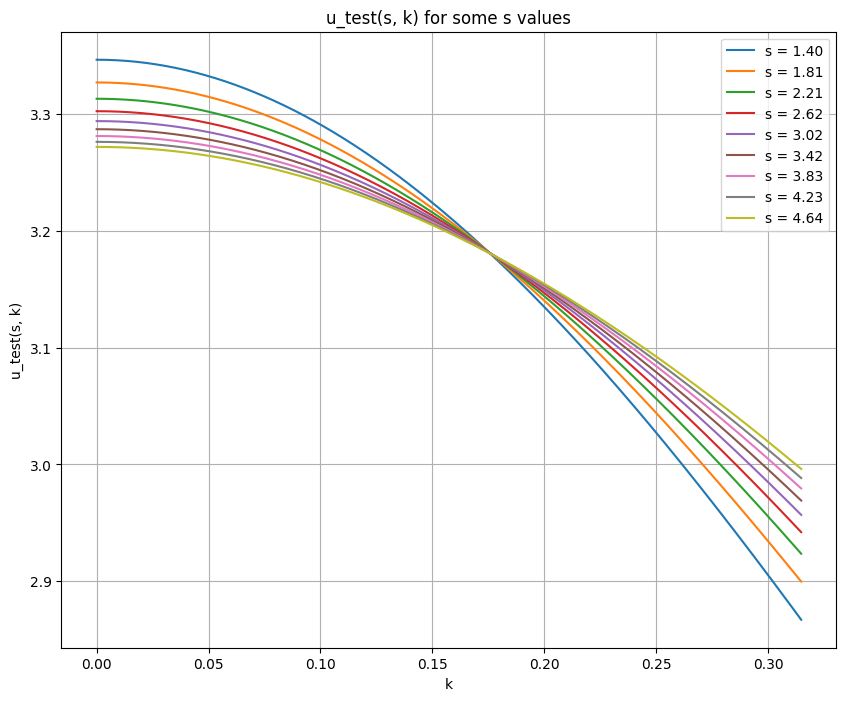

In [54]:
# plot u_test
# plot the u_pred(s, k) for some s values
plt.figure(figsize=(10, 8))
plt.title("u_test(s, k) for some s values")
plt.xlabel("k")
plt.ylabel("u_test(s, k)")
plt.grid()
# plt.ylim(0)
for i in range(0, s_vals.shape[0], 10):
    if i == 0:
        continue
    plt.plot(k_vals, u_test[i, :], label=f"s = {s_vals[i]:.2f}")

plt.legend()
plt.show()

$u(s, k) = \frac{s^{\alpha-1}}{s^{\alpha}+Dk^2}$

In [55]:
# load u.txt and compare with u_test
u = np.loadtxt("u.txt")
print(u.shape)

(100, 500)


average difference for s = 1.40 : 0.0035427780136953304


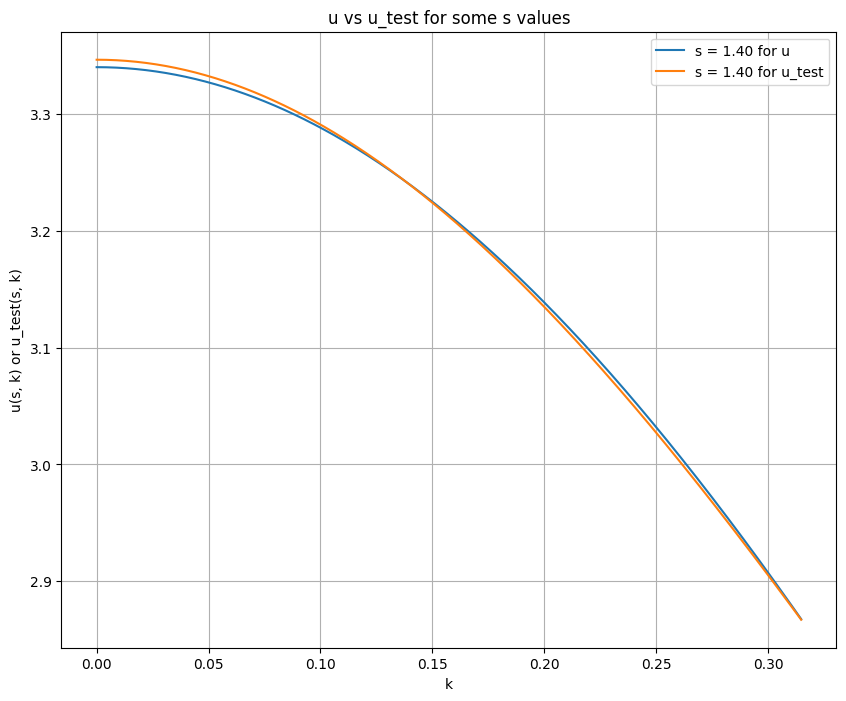

average difference for s = 1.81 : 0.0022082297091584654


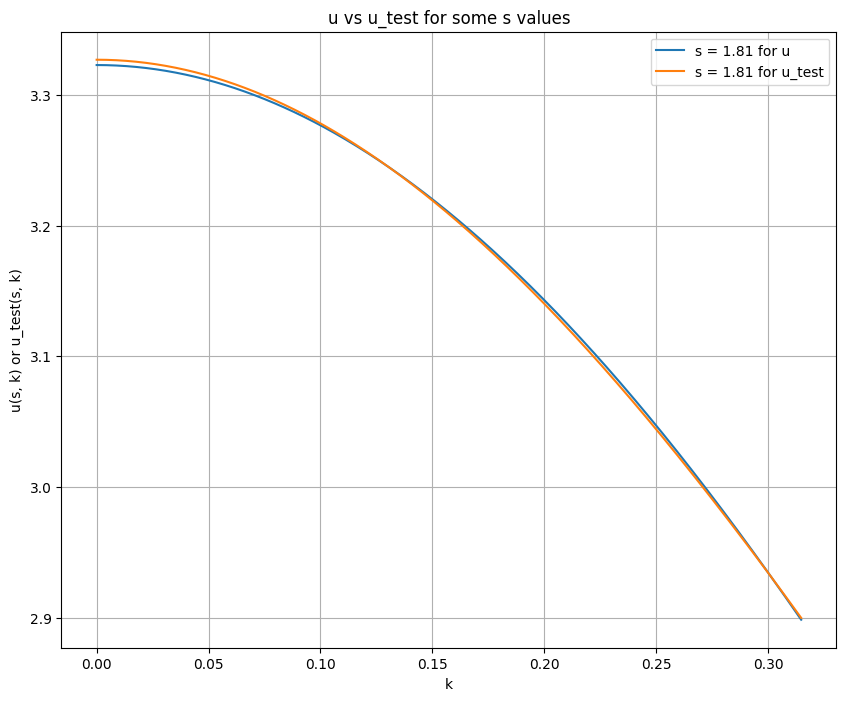

average difference for s = 2.21 : 0.0014318430665986055


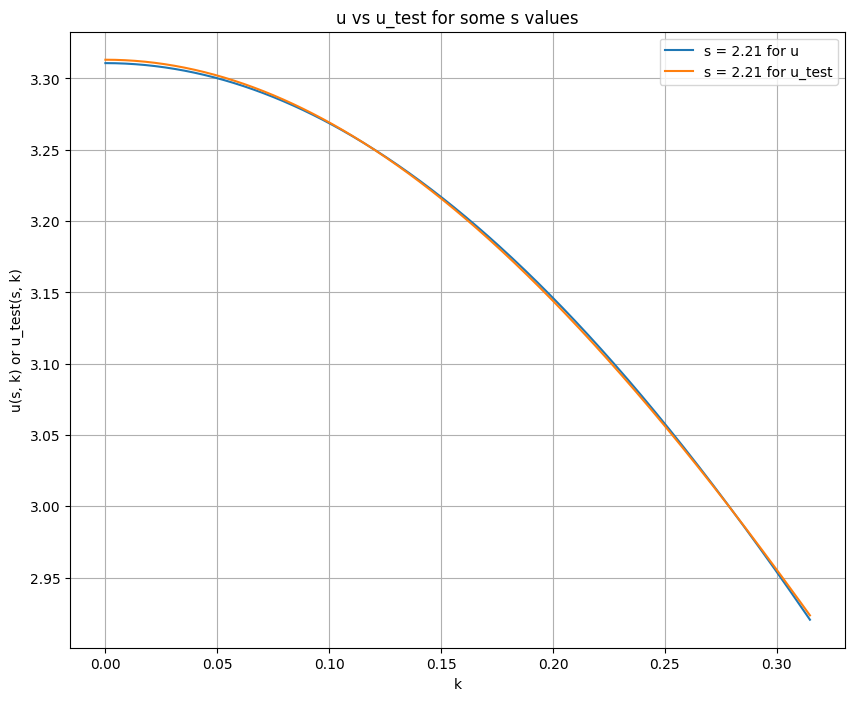

average difference for s = 2.62 : 0.0010735449908655897


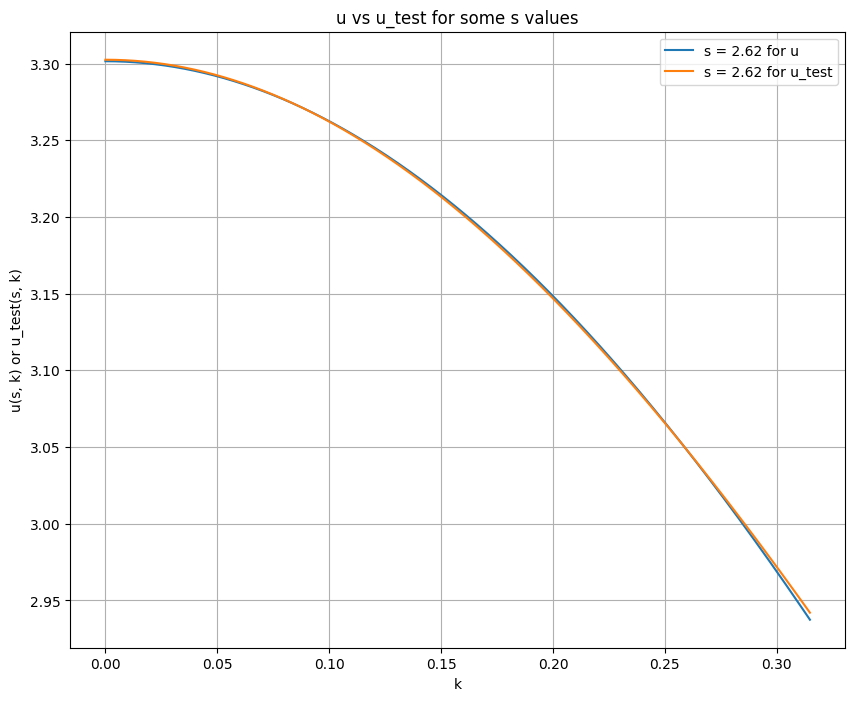

average difference for s = 3.02 : 0.0012452388006952972


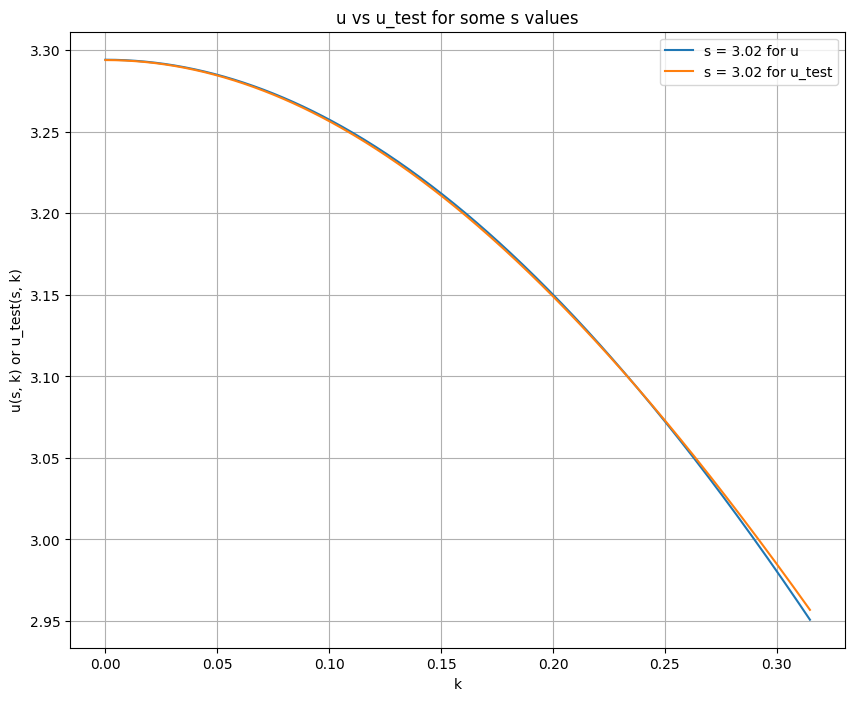

average difference for s = 3.42 : 0.0018152676140381807


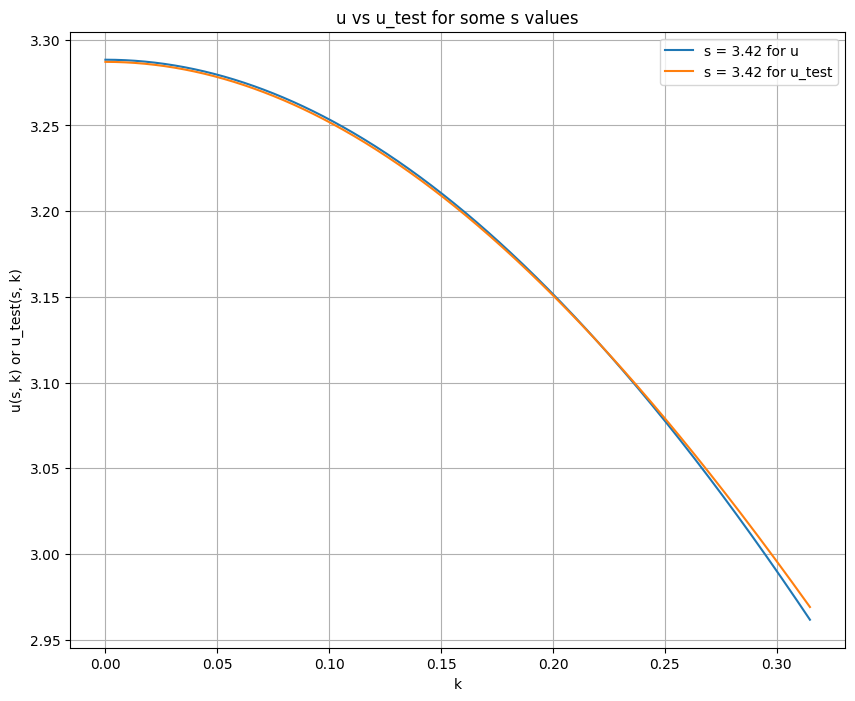

average difference for s = 3.83 : 0.0023767163672018736


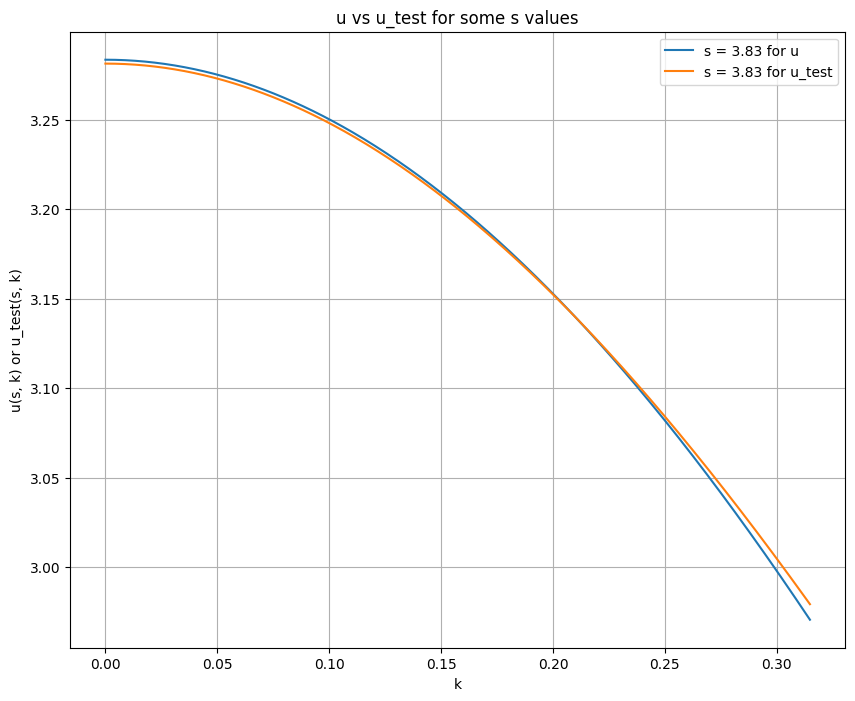

average difference for s = 4.23 : 0.0029077661645727257


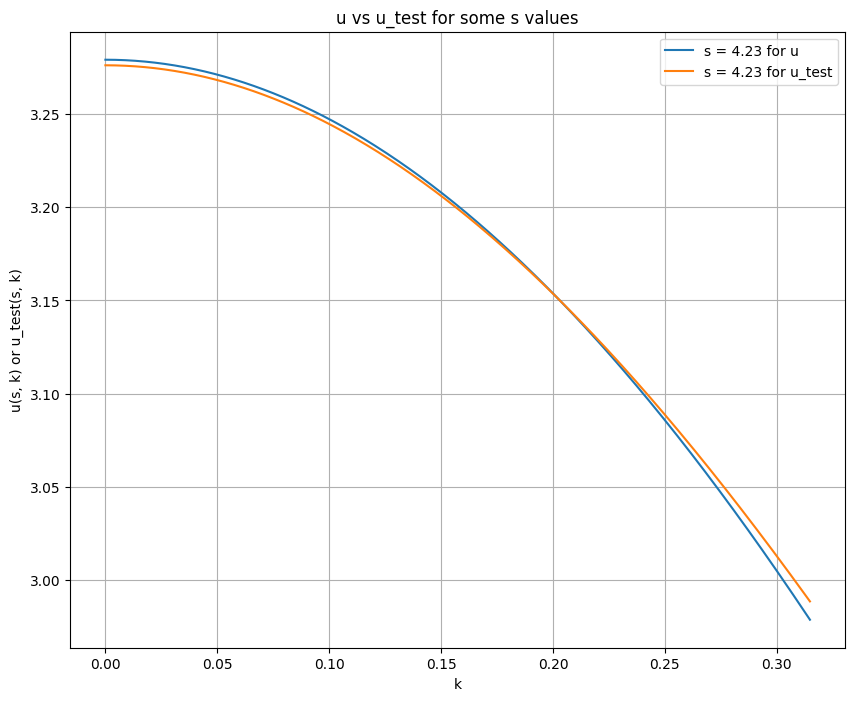

average difference for s = 4.64 : 0.0034024874913133915


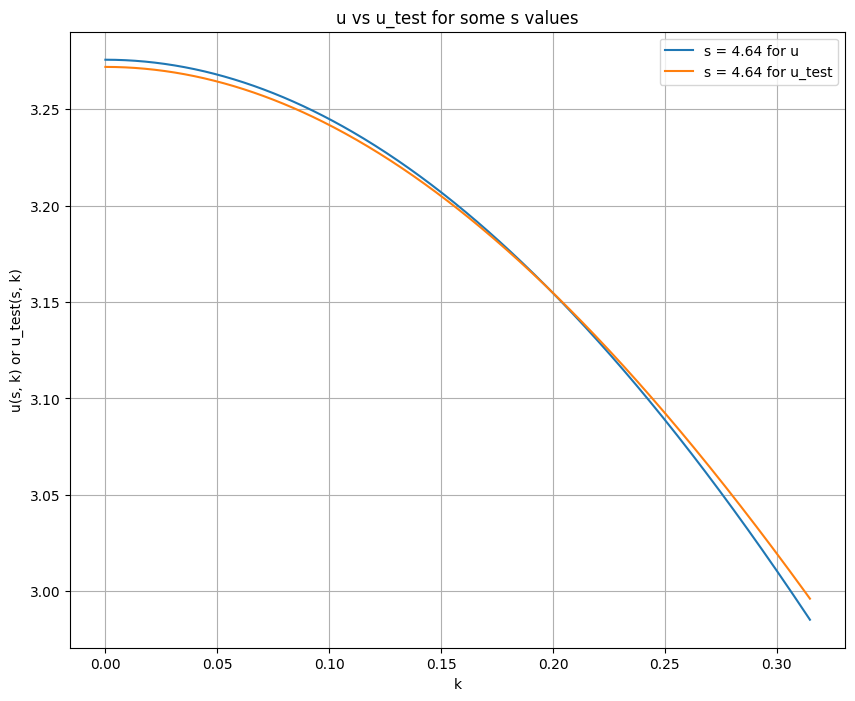

In [56]:
# compare u and u_test

for i in range(0, s_vals.shape[0], 10):
    if i == 0:
        continue
    plt.figure(figsize=(10, 8))
    plt.title("u vs u_test for some s values")
    plt.xlabel("k")
    plt.ylabel("u(s, k) or u_test(s, k)")
    # plt.ylim(0)
    plt.grid()
    plt.plot(k_vals, u[i, :], label=f"s = {s_vals[i]:.2f} for u")
    plt.plot(k_vals, u_test[i, :], label=f"s = {s_vals[i]:.2f} for u_test")
    print(f"average difference for s = {s_vals[i]:.2f} : {np.mean(np.abs(u[i, :]-u_test[i, :]))}")
    plt.legend()
    plt.show()

# plt.legend()
# plt.show()